In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [4]:
file_path = "./data/assignmentMathImagingRecon_chestCT.mat"
with h5py.File(file_path, 'r') as mat_file:
    for key in mat_file.keys():
        print(f"Dataset: {key}, Shape: {mat_file[key].shape}")


Dataset: imageAC, Shape: (512, 512)


1


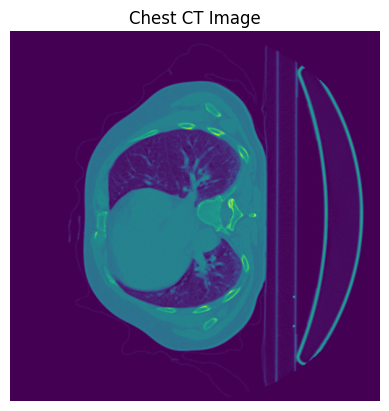

(512, 512)

In [15]:
#Loading Chest CT image
file_path = './data/assignmentMathImagingRecon_chestCT.mat'
with h5py.File(file_path, 'r') as mat:
    print(len(mat.keys()))
    dataset_name = list(mat.keys())[0]  
    image_data = np.array(mat[dataset_name]) 
plt.imshow(image_data)
plt.axis('off') 
plt.title("Chest CT Image")
plt.show()
image_data.shape

2
ans


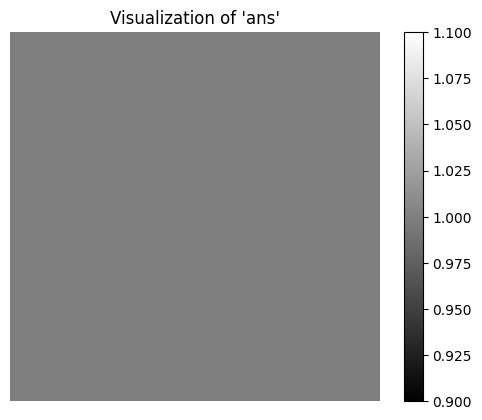

((1, 1), dtype('float64'))

In [6]:
#Loading the first image in myPhantom
file_path = "./data/assignmentMathImagingRecon_myPhantom.mat"
with h5py.File(file_path, 'r') as mat:
    print(len(mat.keys())) #There are two images
    dataset_name = list(mat.keys())[0] 
    image_data = mat[dataset_name][:]
    print(dataset_name)
plt.imshow(image_data, cmap='gray')
plt.colorbar()
plt.title("Visualization of 'ans'")
plt.axis("off")
plt.show()
image_data.shape, image_data.dtype

imageMyPhantomAC


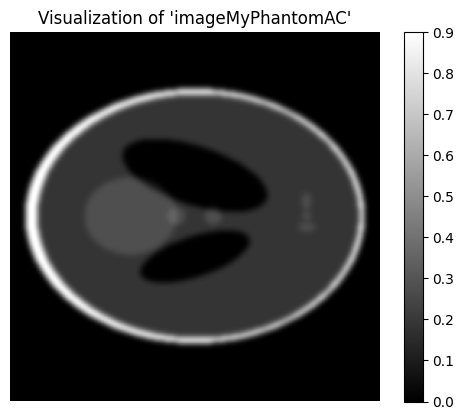

((256, 256), dtype('float64'))

In [7]:
#Loading the second image in myPhantom
file_path = "./data/assignmentMathImagingRecon_myPhantom.mat"
with h5py.File(file_path, 'r') as mat:
    dataset_name = list(mat.keys())[1] 
    image_data = mat[dataset_name][:]
    print(dataset_name)
plt.imshow(image_data, cmap='gray')
plt.colorbar()
plt.title("Visualization of 'imageMyPhantomAC'")
plt.axis("off")
plt.show()
image_data.shape, image_data.dtype

In [8]:
# Function for RRMSE:
def rrmse(A,B):
    num=np.sum((np.abs(A)-np.abs(B))**2)
    den=np.sum(np.abs(A)**2)
    rrmse=np.sqrt(num/den)
    return rrmse 

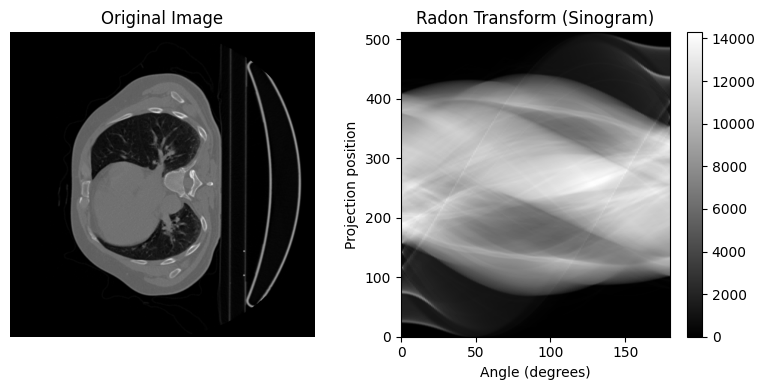

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import radon
from skimage import data
# !pip install scikit-image

# 1. Load your image
# You can load your chest CT image using skimage or any other method you prefer
# For example, here we use a built-in test image from skimage (replace with your own image)
image = image_data # Replace this with your chest CT scan image

# 2. Define the angles at which you want to take the projections (for example, 0 to 180 degrees)
angles = np.linspace(0, 180, 180, endpoint=False)  # 151 angles from 0 to 150 degrees

# 3. Apply the Radon Transform (this will give the sinogram)
sinogram = radon(image, theta=angles)

# 4. Plot the original image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# 5. Plot the Radon transform (sinogram)
plt.subplot(1, 2, 2)
plt.imshow(sinogram, cmap='gray', aspect='auto', extent=(0, 180, 0, sinogram.shape[0]))
plt.title('Radon Transform (Sinogram)')
plt.xlabel('Angle (degrees)')
plt.ylabel('Projection position')
plt.colorbar()
plt.tight_layout()
plt.show()